# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 18: Multi Assets Algorithmic Trading Backtesting with Vectorbt

## 1. Downloading the data:

In [2]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import random
from datetime import datetime

import vectorbt as vbt # version=0.23.0
from vectorbt.portfolio.nb import order_nb, sort_call_seq_nb
from vectorbt.portfolio.enums import SizeType, Direction

import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2010-01-01'
end = '2023-07-31'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

#assets0 = ['A', 'AA', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ', 'AKAM', 'ALL', 'ALLE', 'ALTR', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'AON', 'APA', 'APD', 'APH', 'ATI', 'AVB', 'AVGO', 'AVY', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BK', 'BLK', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CCI', 'CCL', 'CF', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNP', 'CNX', 'COF', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'CVS', 'CVX', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLTR', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQR', 'EQT', 'ESS', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'F', 'FAST', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FITB', 'FLR', 'FLS', 'FMC', 'FOSL', 'FSLR', 'FTI', 'GCI', 'GD', 'GE', 'GILD', 'GIS', 'GLW', 'GM', 'GME', 'GNW', 'GOOG', 'GOOGL', 'GPC', 'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HD', 'HES', 'HIG', 'HOG', 'HON', 'HP', 'HPQ', 'HRB', 'HRL', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IFF', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'ISRG', 'ITW', 'IVZ', 'JCI', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KSS', 'L', 'LEG', 'LEN', 'LH', 'LLY', 'LMT', 'LNC', 'LOW', 'LRCX', 'LUV', 'LYB', 'M', 'MA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'META', 'MHK', 'MKC', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'MU', 'MUR', 'NAVI', 'NBR', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWSA', 'OI', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBI', 'PCAR', 'PCG', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PXD', 'QCOM', 'R', 'REGN', 'RF', 'RHI', 'RIG', 'RL', 'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'SBUX', 'SCHW', 'SE', 'SEE', 'SHW', 'SJM', 'SLB', 'SNA', 'SO', 'SPG', 'SRCL', 'SRE', 'STT', 'STX', 'STZ', 'SWK', 'SWN', 'SYK', 'SYY', 'T', 'TAP', 'TDC', 'TEL', 'TGT', 'THC', 'TJX', 'TMO', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN', 'TXN', 'TXT', 'UA', 'UHS', 'UNH', 'UNM', 'UNP', 'UPS', 'URBN', 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WU', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZION', 'ZTS']
#assets0.sort()

#random.seed(a=0)
#assets = random.sample(assets0, 80)
#assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Close', slice(None))]
data.columns = assets
data = data.dropna()
display(data.head())

[*********************100%***********************]  25 of 25 completed


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,105.870003,56.180000,31.662140,25.629999,8.485,14.52,33.869999,56.060001,23.819256,18.879391,...,6.094303,24.406668,80.129997,22.020000,21.586103,48.549999,47.500000,19.040001,31.212946,13.33
2010-01-05,107.120003,58.020000,31.444866,25.230000,8.370,14.41,33.930000,55.849998,23.919165,18.785694,...,6.078585,24.846666,80.790001,21.790001,21.480364,48.730000,47.660000,18.680000,31.269218,13.80
2010-01-06,108.800003,59.779999,31.553505,25.219999,8.310,14.27,33.549999,55.700001,23.696638,18.723232,...,6.007859,25.173332,80.300003,21.370001,20.853474,49.660000,48.110001,19.330000,29.937416,15.00
2010-01-07,107.150002,62.200001,32.064095,25.240000,8.485,14.41,33.040001,56.099998,23.705723,18.858568,...,5.933202,25.506666,80.190002,21.590000,20.619335,50.270000,48.110001,20.190001,29.759218,16.68
2010-01-08,106.589996,61.599998,32.140141,24.820000,8.460,14.24,32.830002,57.630001,23.882833,18.921032,...,5.901768,25.540001,78.730003,21.680000,20.468279,50.070000,48.919998,20.379999,29.777975,16.41


## 2 Building the Backtest Function with Backtrader 

### 2.1 Building Auxiliary Functions for Rebalancing

In [3]:
vbt.settings.returns['year_freq'] = '252 days'

num_tests = 2000
ann_factor = data.vbt.returns(freq='D').ann_factor

def pre_sim_func_nb(sc, every_nth):
    # Define rebalancing days
    sc.segment_mask[:, :] = False
    sc.segment_mask[every_nth::every_nth, :] = True
    return ()


def pre_segment_func_nb(sc, find_weights_nb, rm, history_len, ann_factor, num_tests, srb_sharpe):
    if history_len == -1:
        # Look back at the entire time period
        close = sc.close[:sc.i, sc.from_col:sc.to_col]
    else:
        # Look back at a fixed time period
        if sc.i - history_len <= 0:
            return (np.full(sc.group_len, np.nan),)  # insufficient data
        close = sc.close[sc.i - history_len:sc.i, sc.from_col:sc.to_col]
    
    # Find optimal weights
    best_sharpe_ratio, weights = find_weights_nb(sc, rm, close, num_tests)
    srb_sharpe[sc.i] = best_sharpe_ratio
        
    # Update valuation price and reorder orders
    size_type = np.full(sc.group_len, SizeType.TargetPercent)
    direction = np.full(sc.group_len, Direction.LongOnly)
    temp_float_arr = np.empty(sc.group_len, dtype=np.float_)
    for k in range(sc.group_len):
        col = sc.from_col + k
        sc.last_val_price[col] = sc.close[sc.i, col]
    sort_call_seq_nb(sc, weights, size_type, direction, temp_float_arr)
    
    return (weights,)


def order_func_nb(oc, weights):
    col_i = oc.call_seq_now[oc.call_idx]
    return order_nb(
        weights[col_i], 
        oc.close[oc.i, oc.col],
        size_type=SizeType.TargetPercent,
        fees=0.0005,
        slippage=0.01,
    )

### 2.2 Building the Optimization Function

In [4]:
import riskfolio as rp
import mosek

def opt_weights(sc, rm, close, num_tests):
    if rm == '1/N':
        N = len(assets)        
        weights = np.ravel(np.ones((N,1))/N)
        shp = 1
    else:
        # Calculate expected returns and sample covariance matrix
        close = pd.DataFrame(close, columns=assets)
        returns = close.pct_change().dropna()
        
        if rm in ['HRP','HERC']:
            # Building the portfolio object
            port = rp.HCPortfolio(returns=returns)

            # Estimate optimal portfolio:

            model=rm # Could be HRP or HERC
            codependence = 'pearson' # Correlation matrix used to group assets in clusters
            rm = 'MV' # Risk measure used, this time will be variance
            rf = 0 # Risk free rate
            linkage = 'ward' # Linkage method used to build clusters
            max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
            leaf_order = True # Consider optimal order of leafs in dendrogram

            w = port.optimization(model=model,
                                codependence=codependence,
                                rm=rm,
                                rf=rf,
                                linkage=linkage,
                                max_k=max_k,
                                leaf_order=leaf_order)
        else:
            # Building the portfolio object
            port = rp.Portfolio(returns=returns,
                                #upperlng=0.20
                                )
            # Calculating optimum portfolio

            # Select method and estimate input parameters:

            method_mu='hist' # Method to estimate expected returns based on historical data.
            method_cov='hist' # Method to estimate covariance matrix based on historical data.
            port.assets_stats(method_mu=method_mu,
                              method_cov=method_cov,
                              d=0.94)

            # Estimate optimal portfolio:
            port.alpha = 0.05
            port.solvers = ['MOSEK']
            port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 6}}}
            model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
            rm = rm # Risk measure used, this time will be variance
            obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
            hist = True # Use historical scenarios for risk measures that depend on scenarios
            rf = 0 # Risk free rate
            l = 0 # Risk aversion factor, only useful when obj is 'Utility'

            w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        weights = np.ravel(w.to_numpy())  
        shp = 1

    return shp, weights

## 3 Building Strategies with Vectorbt

### 3.1 Optimizing Portfolios each Rebalancing Date

In [5]:
%%time

# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.
# 'UCI': Ulcer Index of uncompounded returns.

#rms = ["1/N", "MV", "CVaR", "EVaR", "RLVaR", "HRP"]
rms = ["MV", "CVaR", "EVaR", "RLVaR"]

sharpe = {}
portfolio = {}

for i in rms:
    sharpe[i] = np.full(data.shape[0], np.nan)
    print(i)
    # Run simulation with a custom order function (Numba should be disabled)
    portfolio[i] = vbt.Portfolio.from_order_func(
        data,
        order_func_nb,
        pre_sim_func_nb=pre_sim_func_nb,
        pre_sim_args=(90,),
        pre_segment_func_nb=pre_segment_func_nb,
        pre_segment_args=(opt_weights, i, 252*4, ann_factor, num_tests, sharpe[i]),
        cash_sharing=True,
        init_cash=1000000,
        group_by=True,
        use_numba=False,
    )

MV
CVaR
EVaR
RLVaR
CPU times: user 44.8 s, sys: 1min 16s, total: 2min 1s
Wall time: 13.7 s


### 3.2 Plotting Portfolio Composition each Rebalancing Date

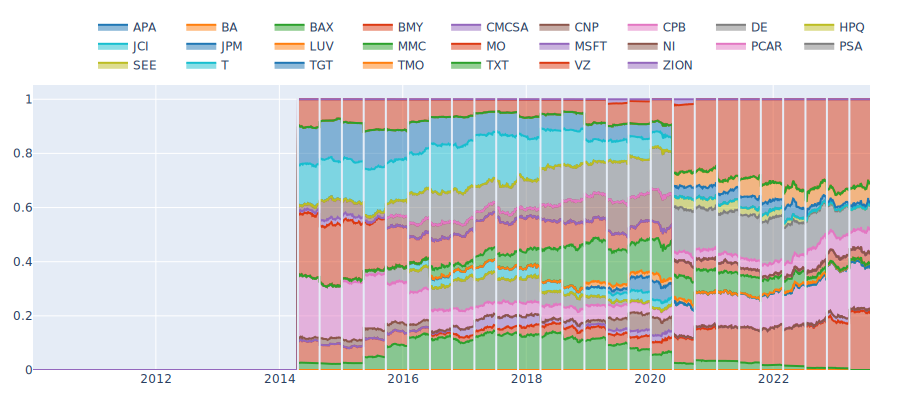

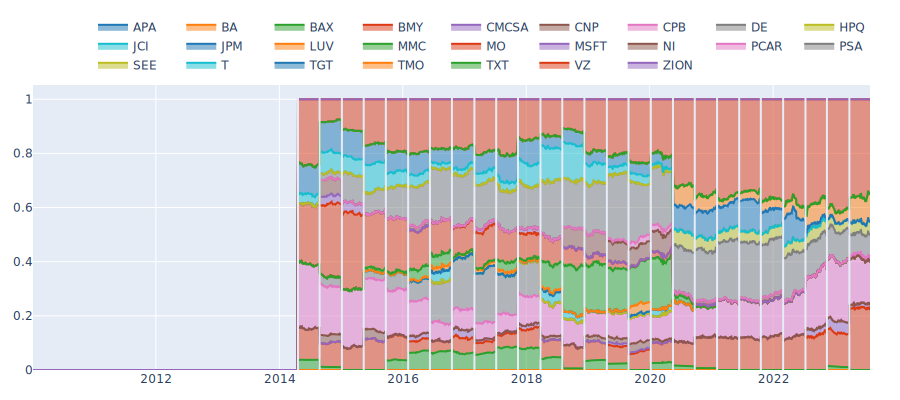

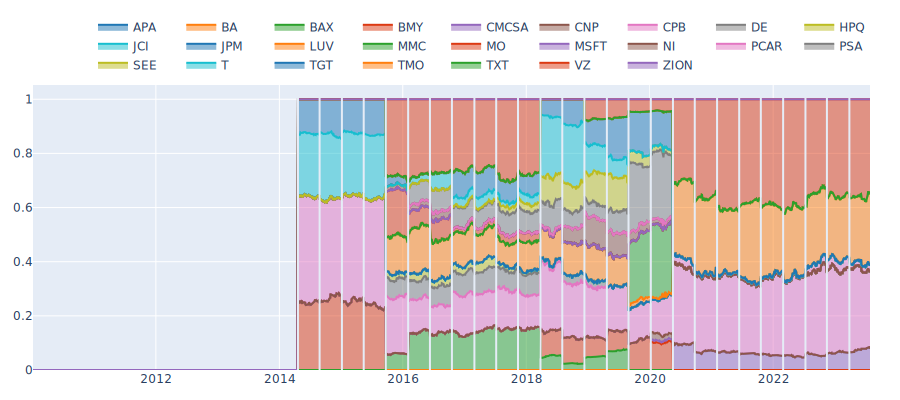

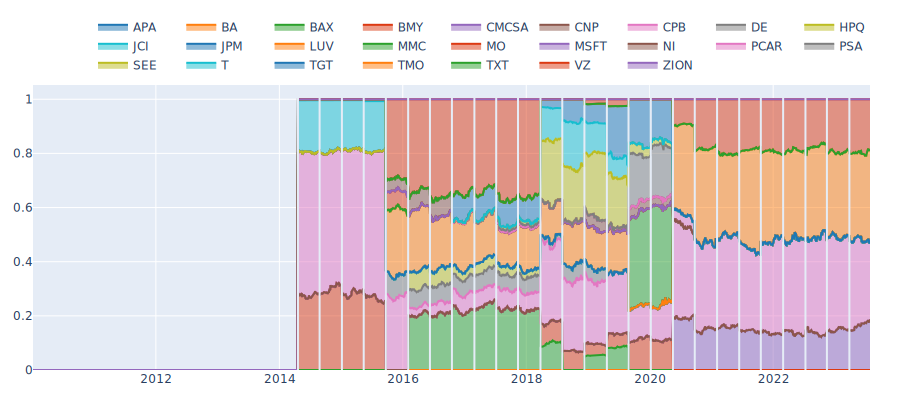

In [6]:
vbt.settings['plotting']['layout']['width'] = 900
vbt.settings['plotting']['layout']['height'] = 400

def plot_allocation(rb_pf):
    # Plot weights development of the portfolio
    rb_asset_value = rb_pf.asset_value(group_by=False)
    rb_value = rb_pf.value()
    rb_idxs = np.flatnonzero((rb_pf.asset_flow() != 0).any(axis=1))
    rb_dates = rb_pf.wrapper.index[rb_idxs]
    fig = (rb_asset_value.vbt / rb_value).vbt.plot(
        trace_names=assets,
        trace_kwargs=dict(
            stackgroup='one'
        )
    )
    for rb_date in rb_dates:
        fig.add_shape(
            dict(
                xref='x',
                yref='paper',
                x0=rb_date,
                x1=rb_date,
                y0=0,
                y1=1,
                line_color=fig.layout.template.layout.plot_bgcolor
            )
        )
    fig.show_svg()
    
for i in rms:
    plot_allocation(portfolio[i])

### 3.3 Plotting Portfolio Values

<Axes: >

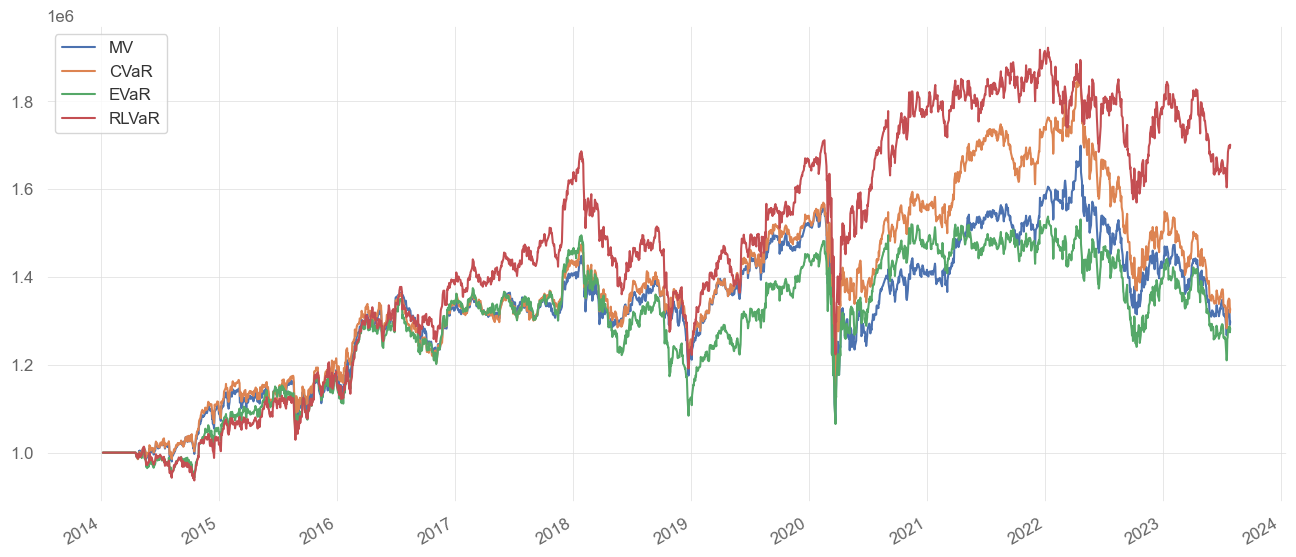

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,7))

values = pd.DataFrame([])
for i in rms:
    a = portfolio[i].value()
    values = pd.concat([values, a], axis=1)

values.columns = rms
values = pd.DataFrame(values).iloc[252*4:]
values.plot(ax=ax)

### 3.4 Portfolio Stats

In [8]:
__LABELS__ = ['Start',
     'End',
     'Period',
     'Start Value',
     'End Value',
     'Total Return [%]',
     'Benchmark Return [%]',
     'Annualized Return [%]',
     'Annualized Volatility [%]',
     'Total Fees Paid',
     'Max Drawdown [%]',
     'Max Drawdown Duration',
     'Sharpe Ratio',
     'Calmar Ratio',
     'Omega Ratio',
     'Sortino Ratio',
     'Skew',
     'Kurtosis',
     'Tail Ratio',
     'Common Sense Ratio',
     'Value at Risk'
     ]

stats = pd.DataFrame([])
for i in rms:
    value = portfolio[i].value()
    b = portfolio[i].stats()
    a = value.pct_change().vbt.returns(freq='d').stats()
    a['Start Value'] = value.iloc[0]
    a['End Value'] = value.iloc[-1]
    a['Total Fees Paid'] = b['Total Fees Paid']
    a['Benchmark Return [%]'] =b['Benchmark Return [%]']
    a = a[__LABELS__]
    stats = pd.concat([stats, a], axis=1)

stats.columns = rms
display(stats)

,MV,CVaR,EVaR,RLVaR
Start,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00
End,2023-07-28 00:00:00,2023-07-28 00:00:00,2023-07-28 00:00:00,2023-07-28 00:00:00
Period,3415 days 00:00:00,3415 days 00:00:00,3415 days 00:00:00,3415 days 00:00:00
Start Value,1000000.0,1000000.0,1000000.0,1000000.0
End Value,1298387.849233,1327597.601921,1282859.855526,1701415.428956
Total Return [%],29.838785,32.75976,28.285986,70.141543
Benchmark Return [%],281.635025,281.635025,281.635025,281.635025
Annualized Return [%],1.945568,2.11307,1.855098,3.999675
Annualized Volatility [%],12.400804,12.09708,12.743255,13.403211
Total Fees Paid,3880.210752,5388.007454,5840.352571,7006.058452
